In [1]:
# SVM Classification
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.datasets import make_classification

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from matplotlib.colors import ListedColormap
from mpl_toolkits import mplot3d
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

In [2]:
Forest_Fires = pd.read_csv('D:/DS Assignments/SVM/forestfires.csv')

In [3]:
Forest_Fires.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [4]:
label_encoder = preprocessing.LabelEncoder()
Forest_Fires['size_category']= label_encoder.fit_transform(Forest_Fires['size_category'])

In [5]:
Forest_Fires.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,1
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,1
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,1
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,1
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,1


In [6]:
X = Forest_Fires.iloc[:,2:30].values

In [7]:
X.shape

(517, 28)

In [8]:
y = Forest_Fires.iloc[:,30].values

In [9]:
y.shape

(517,)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.15, random_state = 12345)

In [11]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((439, 28), (439,), (78, 28), (78,))

In [12]:
zero_one_colourmap_pts = ListedColormap(('red', 'green')) # utilized for plotting a scatter plot. 
#Class 0 pts will be  denoted by red color and class 1 pts will be denoted by green color.
zero_one_colourmap_boundary = ListedColormap(('#FFCCCB', '#90EE90')) # used for plotting a decision boundary.

In [13]:
#I generate 200 samples with 2 features, ie., x1 and x2 and one target variable 'y'.
X, y = make_classification(n_samples=200, n_features=2,n_informative=2, 
                           n_redundant=0, n_repeated=0, n_classes=2,random_state=44)

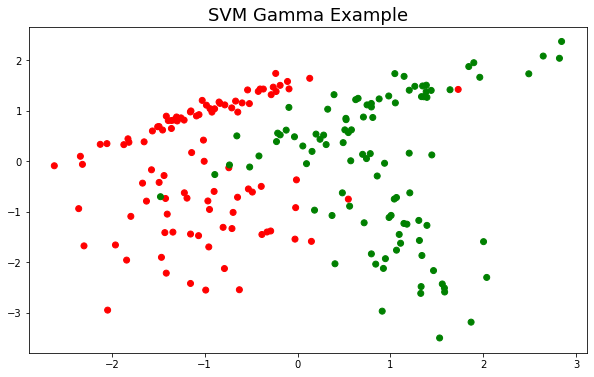

In [14]:
#scatter plot of my dataset
plt.figure(figsize=(10,6))
plt.title("SVM Gamma Example", fontsize=18)
plt.scatter(X[:,0], X[:,1], c=y, cmap=zero_one_colourmap_pts)
#red points signify the class 0 samples and green points signifies the class 1 samples.

In [15]:
# this code is used for plotting the decision boundary

def plot_decision_boundary(X, y, clf):
  X_set, y_set = X, y
  X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
                                 stop = X_set[:, 0].max() + 1, 
                                 step = 0.01),
                       np.arange(start = X_set[:, 1].min() - 1, 
                                 stop = X_set[:, 1].max() + 1, 
                                 step = 0.01))
  plt.figure(figsize=(10,6))
  plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), 
                                             X2.ravel()]).T).reshape(X1.shape),
               alpha = 0.75, 
               cmap = zero_one_colourmap_boundary)
  plt.xlim(X1.min(), X1.max())
  plt.ylim(X2.min(), X2.max())
  for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = (zero_one_colourmap_pts)(i), label = j)
  plt.title('SVM Decision Boundary')
  plt.xlabel('X1')
  plt.ylabel('X2')
  plt.legend()
  return plt.show()

In [16]:
# A user-defined function to get 2parameters ie., input_gamma, input_C and create a classifier, fit my classifier x & y,
# and i make  prediction and calculate the accuracy.Once the ac is calculated, I return the classifier from the function.
def generate_clf(input_gamma, input_C=1):
  classifier = SVC(kernel="rbf", gamma=input_gamma, C=input_C)
  pca = PCA(n_components = 2)
  X_train2 = pca.fit_transform(X_train)
  classifier.fit(X_train2, y_train.ravel())
  X_test2 = pca.fit_transform(X_test)
  y_pred = classifier.predict(X_test2)
  print("Training Accuracy = {}".format(accuracy_score(y_test, y_pred)))
  return classifier

# Classifier 1 - Gamma = 0.001 & C = 10

In [38]:
classifier_1 = generate_clf(0.001, 10)

Training Accuracy = 0.5897435897435898


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


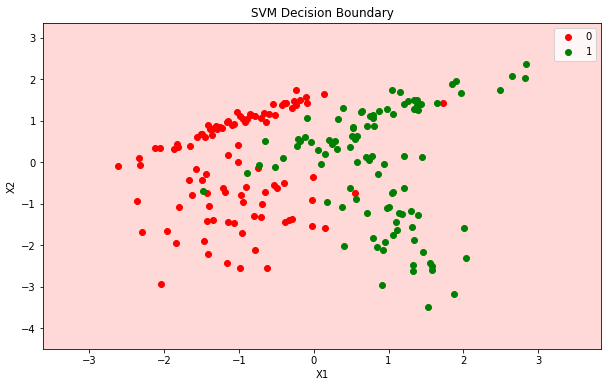

In [39]:
plot_decision_boundary(X, y, classifier_1)

# Classifier 2 - Gamma = 0.01 & C = 1

In [19]:
classifier_2 = generate_clf(0.01, 1)

Training Accuracy = 0.47435897435897434


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


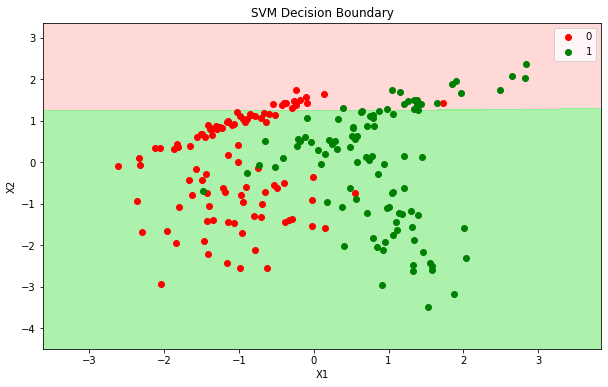

In [21]:
plot_decision_boundary(X, y, classifier_2)

# Classifier 3 - Gamma = 0.001 & C = 0.1

In [22]:
classifier_3 = generate_clf(0.001, 0.1)

Training Accuracy = 0.7435897435897436


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


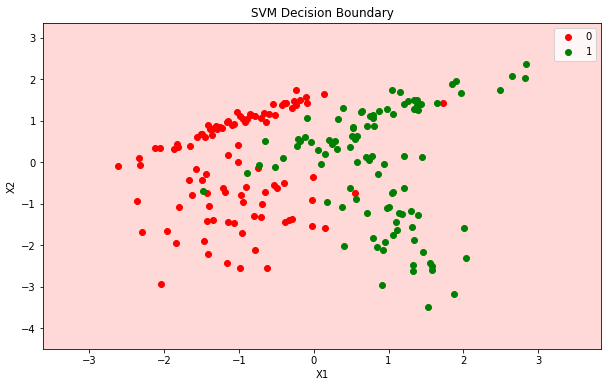

In [21]:
plot_decision_boundary(X, y, classifier_3)

# Classifier 4 - Gamma = 0.01 & C = 10

In [34]:
classifier_4 = generate_clf(0.1, 10)

Training Accuracy = 0.7435897435897436


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


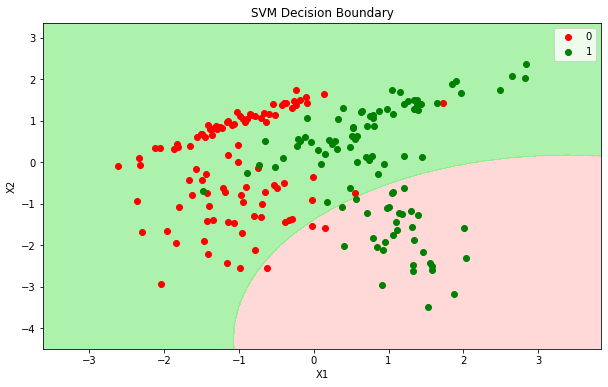

In [35]:
plot_decision_boundary(X, y, classifier_4)

# With 'poly' Kernel

In [41]:
def generate_clf2 (input_gamma, input_C=1):
  classifier2 = SVC(kernel="poly", gamma=input_gamma, C=input_C)
  pca = PCA(n_components = 2)
  X_train2 = pca.fit_transform(X_train)
  classifier2.fit(X_train2, y_train.ravel())
  X_test2 = pca.fit_transform(X_test)
  y_pred2 = classifier2.predict(X_test2)
  print("Training Accuracy = {}".format(accuracy_score(y_test, y_pred2)))
  return classifier2

In [42]:
classifier_5 = generate_clf2(0.001, 10)

Training Accuracy = 0.6025641025641025


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


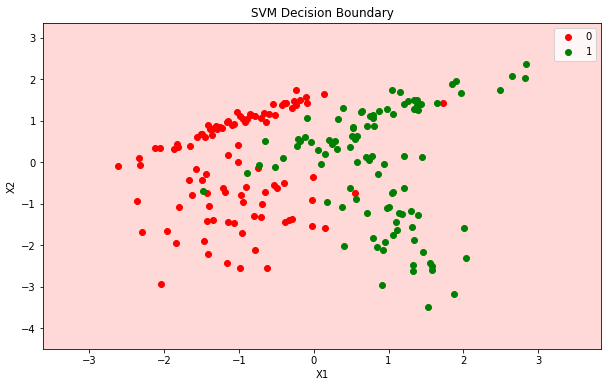

In [43]:
plot_decision_boundary(X, y, classifier_5)